In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

In [41]:
data = pd.read_csv("data/data_with_categories.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21991 entries, 0 to 21990
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   session_length                              21991 non-null  int64  
 1   discount                                    21991 non-null  int64  
 2   user_id                                     21991 non-null  int64  
 3   successful                                  21991 non-null  int64  
 4   mean_price                                  21991 non-null  float64
 5   min_price                                   21991 non-null  float64
 6   max_price                                   21991 non-null  float64
 7   mean_rating                                 21991 non-null  float64
 8   min_rating                                  21991 non-null  float64
 9   max_rating                                  21991 non-null  float64
 10  prev_succe

In [42]:
sessions_num = len(data)
purchases = data[data["successful"] == 1]
purchases_num = len(purchases)
purchases_ratio = round(purchases_num / sessions_num, 3)

print("Number of sessions: ", sessions_num)
print("Number of purchases: ", purchases_num)
print("Ratio of purchases: ", purchases_ratio)

Number of sessions:  21991
Number of purchases:  5816
Ratio of purchases:  0.264


In [56]:
sessions_by_purchases = data[["discount", "successful"]].groupby("successful").count().reset_index("successful")
sessions_by_purchases = sessions_by_purchases.rename(columns={"discount": "count"})
sessions_by_purchases

,successful,count
0,0,16175
1,1,5816


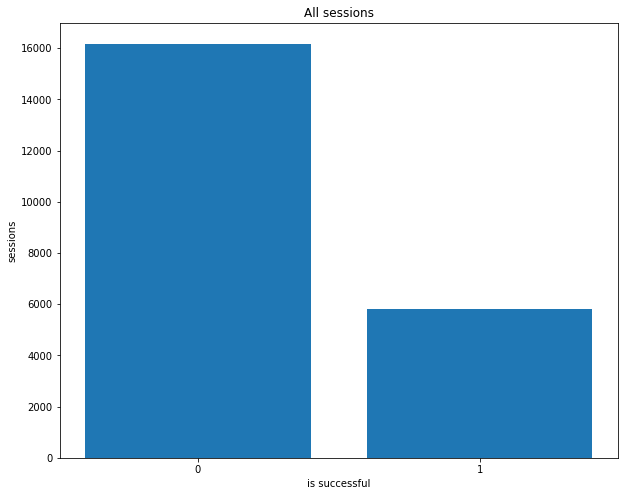

In [58]:
figure(figsize=(10, 8))

x_pos = np.arange(len(sessions_by_purchases["count"]))

plt.bar(x_pos, sessions_by_purchases["count"])

plt.title("All sessions")
plt.xlabel("is successful")
plt.ylabel("sessions")

plt.xticks(x_pos, sessions_by_purchases["successful"])

plt.show()

In [43]:
sessions_by_discount = data[["discount", "successful"]].groupby("discount").count().reset_index("discount")
sessions_by_discount = sessions_by_discount.rename(columns={"successful": "all"})
sessions_by_discount

,discount,all
0,0,13150
1,5,2227
2,10,2214
3,15,2198
4,20,2202


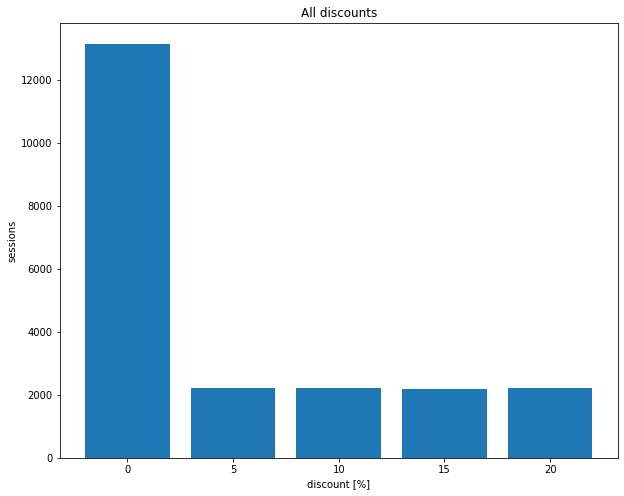

In [44]:
figure(figsize=(10, 8))

x_pos = np.arange(len(sessions_by_discount["all"]))

plt.bar(x_pos, sessions_by_discount["all"])

plt.title("All discounts")
plt.xlabel("discount [%]")
plt.ylabel("sessions")

plt.xticks(x_pos, sessions_by_discount["discount"])

plt.show()

In [45]:
purchases_by_discount = data[["discount", "successful"]].groupby("discount").sum().reset_index("discount")
purchases_by_discount

,discount,successful
0,0,1328
1,5,932
2,10,1075
3,15,1238
4,20,1243


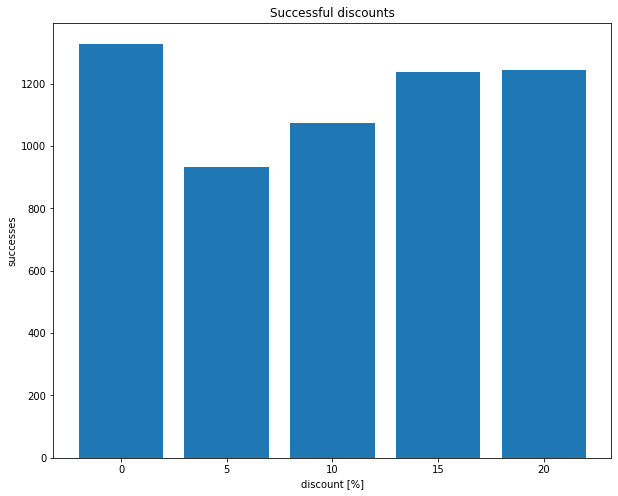

In [46]:
figure(figsize=(10, 8))

x_pos = np.arange(len(purchases_by_discount["successful"]))

plt.bar(x_pos, purchases_by_discount["successful"])

plt.title("Successful discounts")
plt.xlabel("discount [%]")
plt.ylabel("successes")

plt.xticks(x_pos, purchases_by_discount["discount"])

plt.show()

In [47]:
purchase_ratio_per_discount = purchases_by_discount
purchase_ratio_per_discount["all"] = sessions_by_discount["all"]
purchase_ratio_per_discount["ratio"] = purchase_ratio_per_discount["successful"] / purchase_ratio_per_discount["all"]
purchase_ratio_per_discount

,discount,successful,all,ratio
0,0,1328,13150,0.100989
1,5,932,2227,0.418500
2,10,1075,2214,0.485547
3,15,1238,2198,0.563239
4,20,1243,2202,0.564487


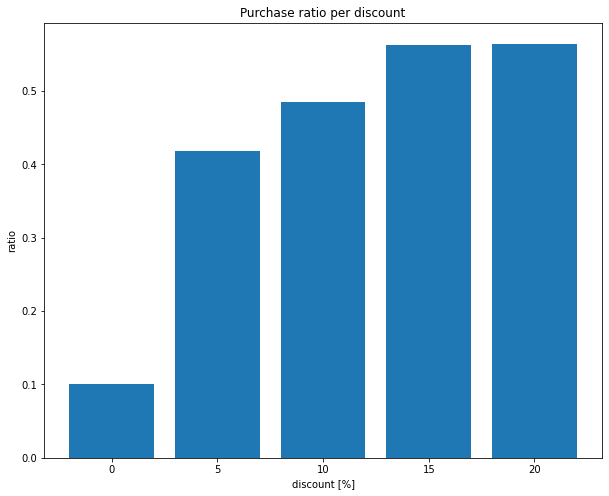

In [48]:
figure(figsize=(10, 8))

x_pos = np.arange(len(purchase_ratio_per_discount["ratio"]))

plt.bar(x_pos, purchase_ratio_per_discount['ratio'])

plt.title('Purchase ratio per discount')
plt.xlabel('discount [%]')
plt.ylabel('ratio')

plt.xticks(x_pos, purchase_ratio_per_discount['discount'])

plt.show()

In [88]:
columns = data.columns.tolist()
categories = [col for col in columns if col.startswith('category_')]
most_popular_categories = data[categories].sum().sort_values(ascending=False).reset_index()
most_popular_categories = most_popular_categories.rename(columns={"index": "category", 0: "sum"})
most_popular_categories

,category,sum
0,category_Gry_i_konsole,45019
1,category_Komputery,32436
2,category_Gry_na_konsole,29618
3,category_Sprzęt_RTV,24806
4,category_Video,19820
5,category_Telefony_i_akcesoria,19353
6,category_Telewizory_i_akcesoria,16633
7,category_Gry_Xbox_360,15595
8,category_Gry_komputerowe,15401
9,category_Monitory,14914


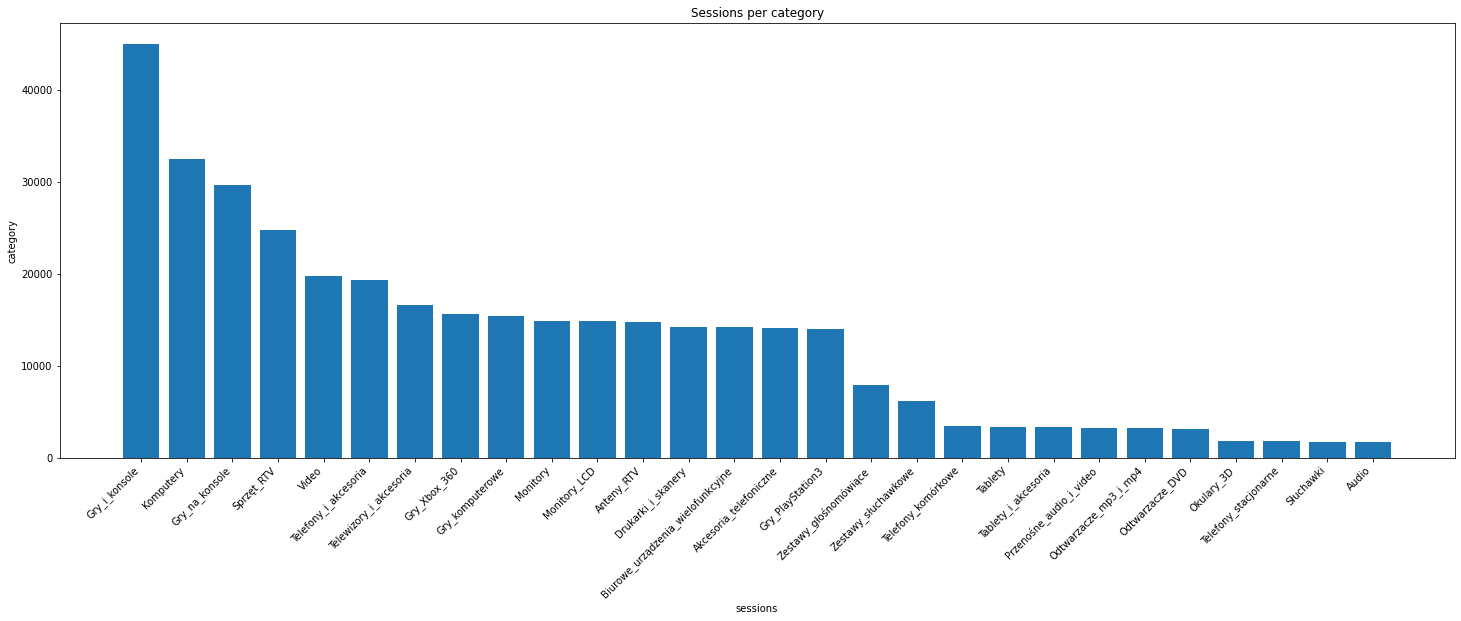

In [100]:
figure(figsize=(25, 8))

x_pos = np.arange(len(most_popular_categories["sum"]))

plt.bar(x_pos, most_popular_categories["sum"])

plt.title("Sessions per category")
plt.xlabel("sessions")
plt.ylabel("category")

plt.xticks(x_pos, most_popular_categories["category"].str.split("category_", n=1).str[1], rotation=45, horizontalalignment="right")

plt.show()

In [104]:
successful_sessions_categories = purchases[categories].sum().sort_values(ascending=False).reset_index()
successful_sessions_categories = successful_sessions_categories.rename(columns={"index": "category", 0: "sum"})
successful_sessions_categories

,category,sum
0,category_Gry_i_konsole,12416
1,category_Komputery,9602
2,category_Gry_na_konsole,8225
3,category_Sprzęt_RTV,7750
4,category_Telefony_i_akcesoria,6394
5,category_Video,5910
6,category_Telewizory_i_akcesoria,4797
7,category_Akcesoria_telefoniczne,4427
8,category_Gry_Xbox_360,4345
9,category_Monitory,4224


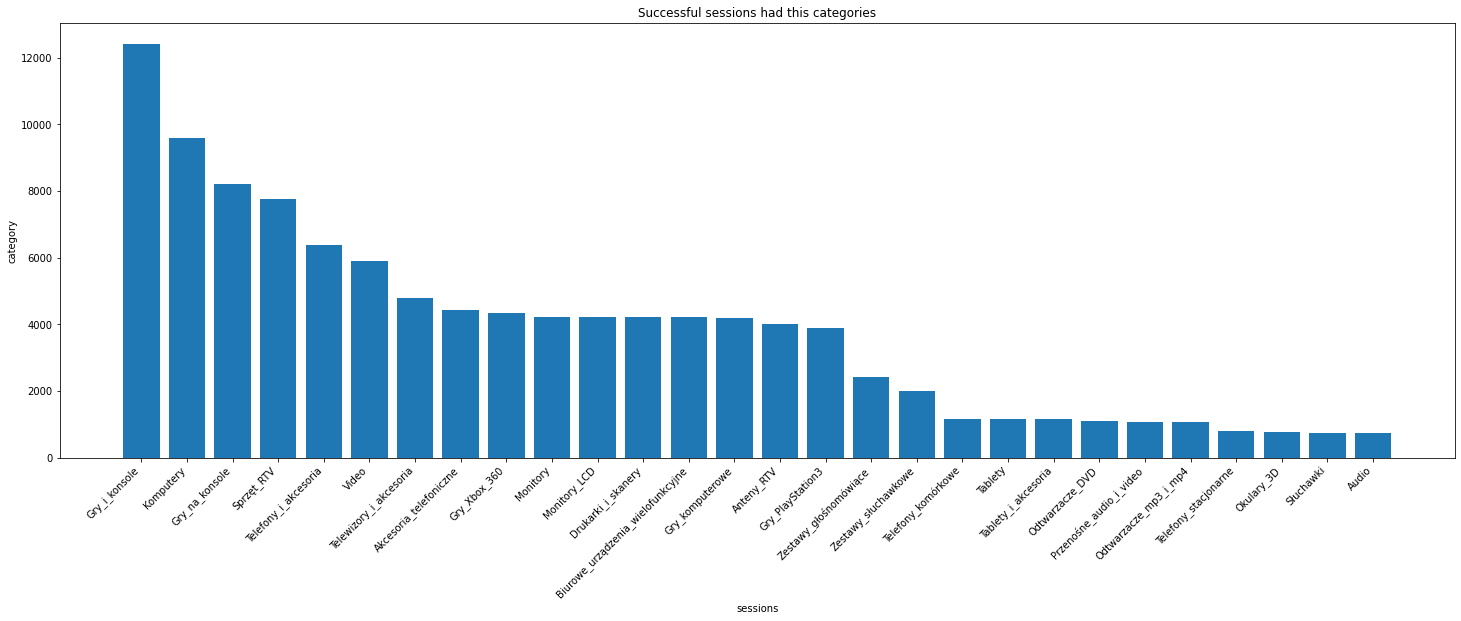

In [105]:
figure(figsize=(25, 8))

x_pos = np.arange(len(successful_sessions_categories["sum"]))

plt.bar(x_pos, successful_sessions_categories["sum"])

plt.title("Successful sessions had this categories")
plt.xlabel("sessions")
plt.ylabel("category")

plt.xticks(x_pos, successful_sessions_categories["category"].str.split("category_", n=1).str[1], rotation=45, horizontalalignment="right")

plt.show()

In [49]:
cities = ["Gdynia", "Kraków", "Poznań", "Radom", "Szczecin", "Warszawa", "Wrocław"]
purchases_by_cities = purchases[cities].sum().sort_values(ascending=False)
purchases_by_cities

Warszawa    1466
Radom       1221
Wrocław     1071
Kraków       887
Gdynia       593
Poznań       324
Szczecin     254
dtype: int64

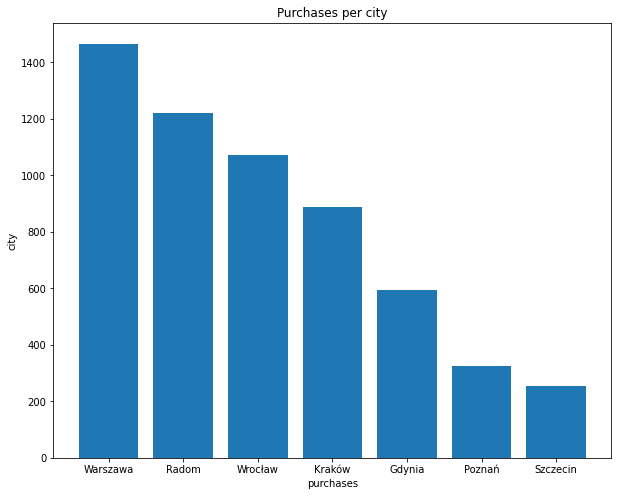

In [50]:
figure(figsize=(10, 8))

x_pos = np.arange(len(purchases_by_cities))

plt.bar(x_pos, purchases_by_cities)

plt.title("Purchases per city")
plt.xlabel("purchases")
plt.ylabel("city")

plt.xticks(x_pos, purchases_by_cities.index)

plt.show()

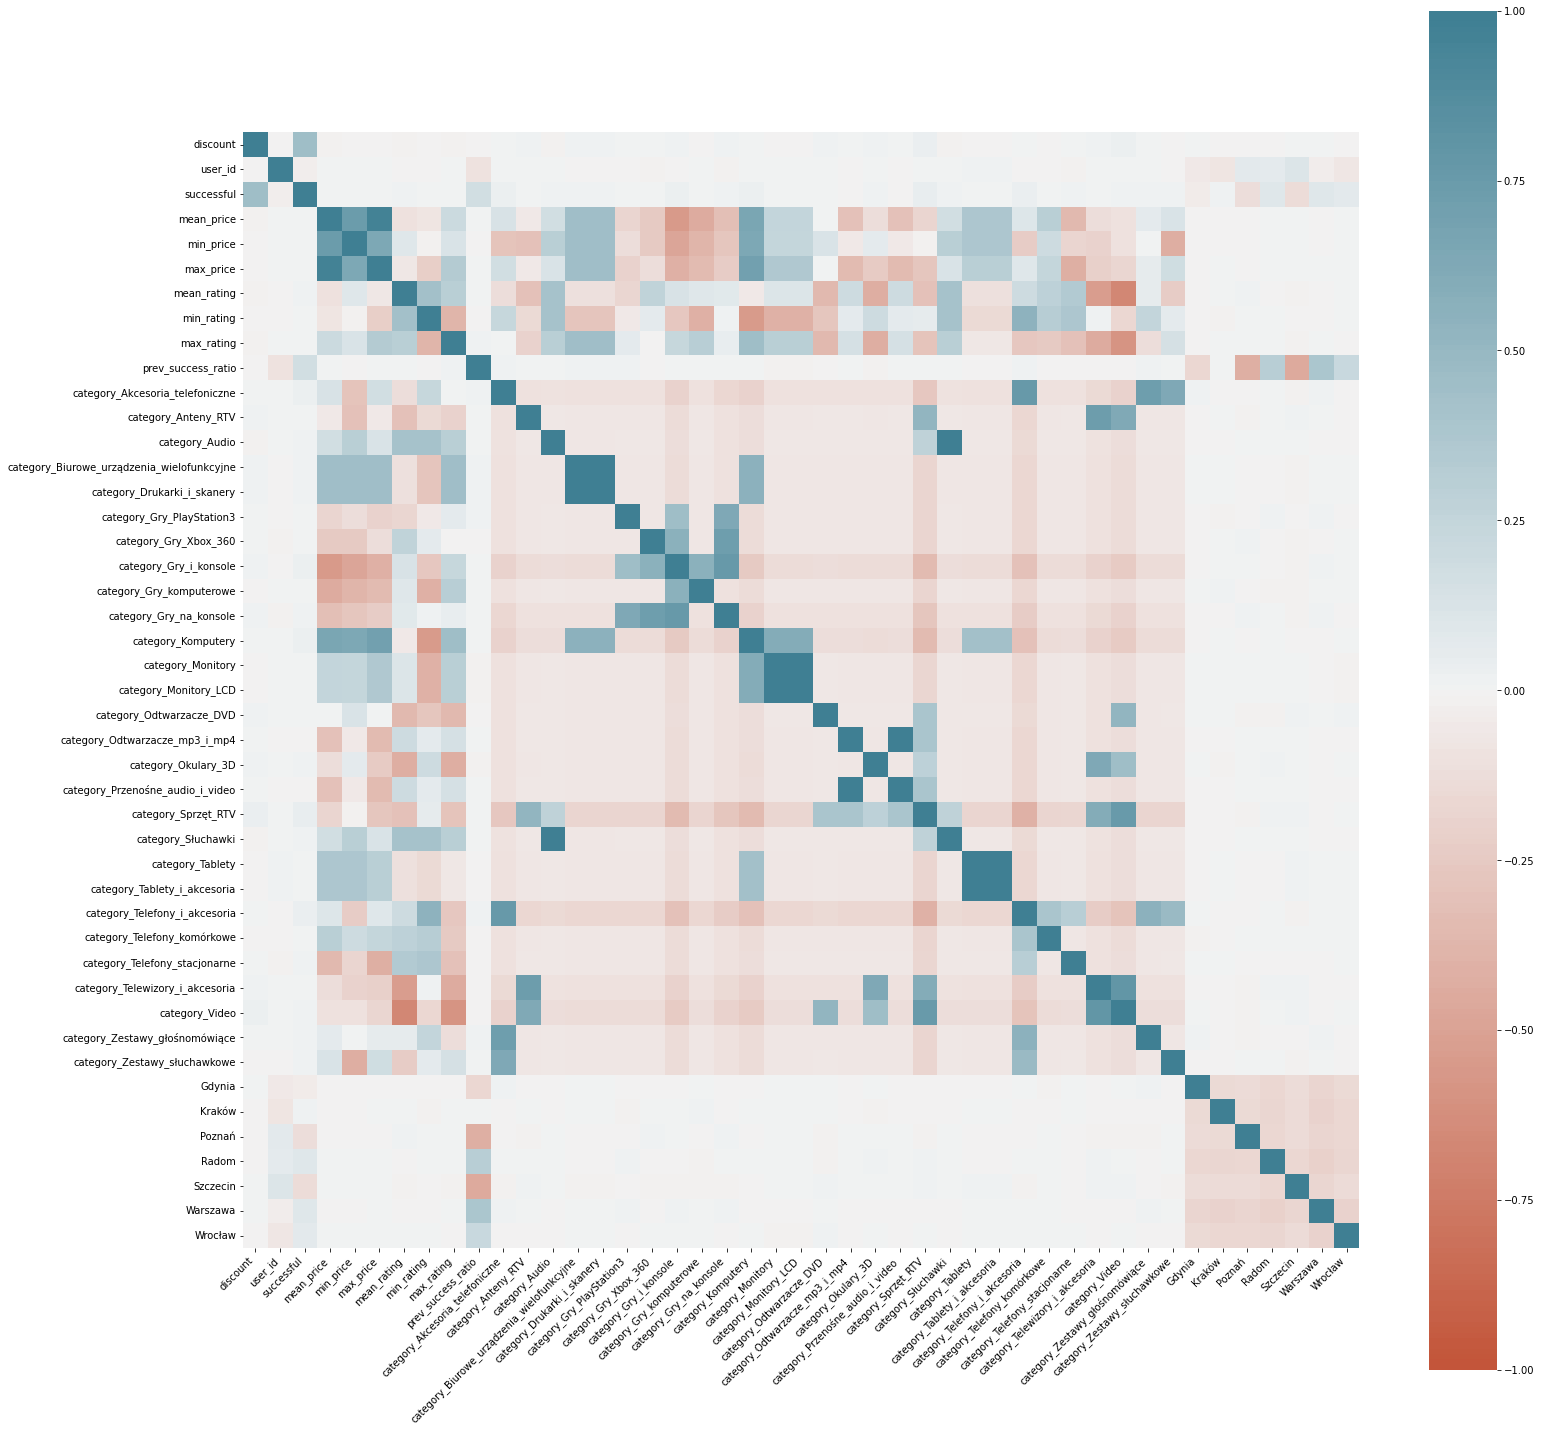

In [51]:
import seaborn as sns

figure(figsize=(25, 25))

corr = data.iloc[:, 1:].corr(method="spearman")
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);